# 4班 李子牧 1120230660

 *1.导入基础库并设置中文字体*

In [11]:
# 导入基础库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

*2.加载数据集*

In [12]:
# 加载训练数据
train_data = pd.read_csv('complete_train_samples.csv')
print("训练数据形状:", train_data.shape)

# 准备特征和目标变量
X_train = train_data[['XA', 'XB']].values
y_train = train_data['Y'].values

训练数据形状: (365, 4)


*3.构造线性回归模型*

In [13]:
# 构造线性回归模型
class ManualLinearRegression:
    def __init__(self):
        self.coef_ = None  # 系数
        self.intercept_ = None  # 截距

    def fit(self, X, y):
        """
        使用最小二乘法拟合线性回归模型
        """
        # 添加一列1用于计算截距
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]

        # 计算参数: β = (X^T X)^(-1) X^T y
        XTX = np.dot(X_with_intercept.T, X_with_intercept)
        XTX_inv = np.linalg.inv(XTX)
        XTy = np.dot(X_with_intercept.T, y)
        beta = np.dot(XTX_inv, XTy)

        # 分离截距和系数
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

        return self

    # 使用模型进行预测
    def predict(self, X):
        return self.intercept_ + np.dot(X, self.coef_)

*4.构造KNN回归模型*

In [14]:
# 构造KNN回归模型
class ManualKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def predict(self, X):
        predictions = []

        for test_sample in X:
            # 计算测试样本与所有训练样本的距离
            distances = []
            for i, train_sample in enumerate(self.X_train):
                dist = self._euclidean_distance(test_sample, train_sample)
                distances.append((dist, i))

            # 按距离排序并选择最近的k个邻居
            distances.sort(key=lambda x: x[0])
            nearest_indices = [idx for _, idx in distances[:self.n_neighbors]]

            # 计算邻居目标值的平均值作为预测值
            neighbor_values = [self.y_train[idx] for idx in nearest_indices]
            prediction = np.mean(neighbor_values)
            predictions.append(prediction)

        return np.array(predictions)

*5.计算$R^2$*

In [15]:
# 计算R²
def manual_r2_score(y_true, y_pred):

    # 总平方和
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    # 残差平方和
    ss_residual = np.sum((y_true - y_pred) ** 2)
    # R² = 1 - (SS_res / SS_tot)
    r2 = 1 - (ss_residual / ss_total)
    return r2

*6.训练模型*

In [16]:
# 训练线性回归模型
print("训练线性回归模型...")
manual_lr = ManualLinearRegression()
manual_lr.fit(X_train, y_train)
lr_predictions = manual_lr.predict(X_train)
lr_r2 = manual_r2_score(y_train, lr_predictions)
print(f"线性回归模型R²分数: {lr_r2:.4f}")

训练线性回归模型...
线性回归模型R²分数: 0.1758


In [17]:
# 训练KNN回归模型
print("训练KNN回归模型...")
manual_knn = ManualKNNRegressor(n_neighbors=5)
manual_knn.fit(X_train, y_train)
knn_predictions = manual_knn.predict(X_train)
knn_r2 = manual_r2_score(y_train, knn_predictions)
print(f"KNN回归模型R²分数: {knn_r2:.4f}")

训练KNN回归模型...
KNN回归模型R²分数: 0.9313


*7.结果可视化*

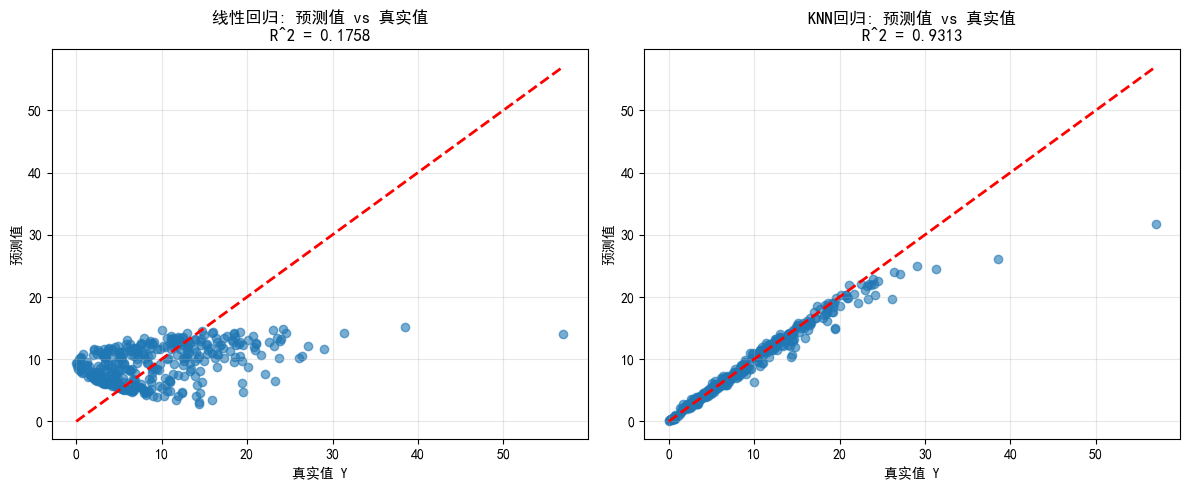

In [18]:
# 绘制预测值与真实值对比图
plt.figure(figsize=(12, 5))

# 线性回归可视化
plt.subplot(1, 2, 1)
plt.scatter(y_train, lr_predictions, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('真实值 Y')
plt.ylabel('预测值')
plt.title(f'线性回归: 预测值 vs 真实值\nR^2 = {lr_r2:.4f}')
plt.grid(True, alpha=0.3)

# KNN回归可视化
plt.subplot(1, 2, 2)
plt.scatter(y_train, knn_predictions, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('真实值 Y')
plt.ylabel('预测值')
plt.title(f'KNN回归: 预测值 vs 真实值\nR^2 = {knn_r2:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

*8.使用训练好的模型进行预测*

In [19]:
print("开始测试数据预测...")

# 加载测试数据
test_data = pd.read_csv('test_samples.csv')
X_test = test_data[['XA', 'XB']].values
print(f"测试数据形状: {test_data.shape}")

# 使用线性回归模型进行预测
test_predictions_lr = manual_lr.predict(X_test)
print(f"线性回归预测完成")

# 使用KNN模型进行预测
test_predictions_knn = manual_knn.predict(X_test)
print(f"KNN回归预测完成")

print(f"共预测 {len(test_predictions_lr)} 个样本")

开始测试数据预测...
测试数据形状: (100, 4)
线性回归预测完成
KNN回归预测完成
共预测 100 个样本



*9.保存预测结果*

In [20]:
# 创建包含两种模型预测结果的DataFrame
result_df = pd.DataFrame({
    'XA': test_data['XA'],
    'XB': test_data['XB'],
    'LR_Prediction': test_predictions_lr,
    'KNN_Prediction': test_predictions_knn,
})

# 保存预测结果
result_df.to_csv('test_prediction.csv', index=False)

print("预测结果已保存到 'test_prediction.csv'")
print(f"文件包含 {len(result_df.columns)} 列: {list(result_df.columns)}")
print(f"样本数量: {len(result_df)}")

# 显示预测结果的前几行
print("\n预测结果预览:")
print(result_df.head())

预测结果已保存到 'test_prediction.csv'
文件包含 4 列: ['XA', 'XB', 'LR_Prediction', 'KNN_Prediction']
样本数量: 100

预测结果预览:
          XA        XB  LR_Prediction  KNN_Prediction
0 -12.671681 -7.306543      12.278165       11.473173
1 -11.487660 -9.087888      12.953572       11.851797
2 -20.186620 -8.324280      12.790395       22.822250
3 -21.328491 -9.978138      13.452034       24.453682
4 -21.705287 -2.800115      10.662666       19.668648
